                    Bank Note Authenticator

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
df.shape

(1372, 5)

In [6]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [9]:
df.duplicated().sum()

24

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [12]:
df.isna().sum().sum()

0

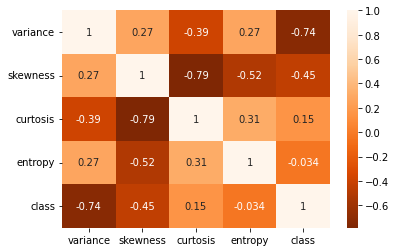

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='Oranges_r')
plt.show()

In [20]:
df.sample(n=2)

,variance,skewness,curtosis,entropy,class
538,0.72252,-0.053811,5.6703,-1.3509,0
951,-1.69360,2.785200,-2.1835,-1.9276,1


In [21]:
X = df.iloc[:,:-1]

In [22]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [23]:
y = df.iloc[:,-1]

In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.27
)

In [26]:
X_train.shape

(984, 4)

In [27]:
X_test.shape

(364, 4)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = rand_clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9945054945054945

            99.45% accuracy

                            Prediction

In [32]:
rand_clf.predict([[2,3,4,1]])

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [34]:
rand_clf.predict([[1,1,9,2]])

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

`Deployment`

In [31]:
import pickle

pickle_out = open('classifier.pkl', mode='wb')
pickle.dump(rand_clf, pickle_out)
pickle_out.close()